In [1]:
import numpy as np
from wlpy.gist import heatmap

In [2]:
import matplotlib.pyplot as plt

In [3]:
rng = np.random.default_rng()

In [4]:
def normalize_covariance(S):
    D_inv = np.diag(np.diag(S) ** - 0.5)
    return D_inv @ S @ D_inv

def mass(N, k = 5, max_mass = 0.5):
    M = rng.noncentral_chisquare(k, False, size = N)
    # M = rng.exponential(1, size = N)
    # M = rng.uniform(0, 1, size = N)
    M = np.sort(M)
    M = M / np.max(M) * max_mass
    return M

def gen_cov(N, mass, poly_param = [0.8, 0.5], normalize = False):
    """Generate a covariance matrix with gravity model, with diagonal elements equal to 1.
    $y = (I + b_1 G + b_2 G^2) e$ for a network matrix $G$

    Args:
        N: the dimension of the covariance matrix
        mass: the vector containing the mass of $N$ nodes

    Returns:
        covariance : a N by N covariance matrix
    """
    prob_of_link = np.array([[x * y for x in mass] for y in mass])

    network = rng.binomial(1, prob_of_link)
    network = network - np.diag(np.diag(network))

    pre_cov = np.eye(N) + poly_param[0] * network + \
        poly_param[1] * (network @ network).clip(0, 1)

    if normalize:
        cov = normalize_covariance(pre_cov @ pre_cov.T)
    else:
        cov = pre_cov @ pre_cov.T
        
    return cov

def gen_aux_set(cov, prob, qrob, observe_level):
    P = np.random.binomial(1, prob, size = cov.shape)
    Q = np.random.binomial(1, qrob, size = cov.shape)

    GP = np.where((cov > observe_level) & (P == 1), 1, 0)
    GQ = np.where((cov <= observe_level) & (Q == 1), 1, 0)

    aux_set = GP + GQ
    return aux_set

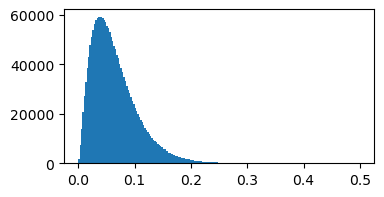

In [5]:
# Nonconcentral chisquare
M = mass(2000000, k = 5, max_mass = 0.5)
plt.figure(figsize = (4, 2))
plt.hist(M, bins = 200);

In [39]:
N = 500
M = mass(N, k = 5, max_mass = 0.5)
cov = gen_cov(N, M, poly_param = [0.8, 0.5])
# heatmap(cov);
p = np.argsort(np.diag(cov))

136.28 1.0


d:\BaiduSyncdisk\Project\Co_simu_3\wlpy\gist.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


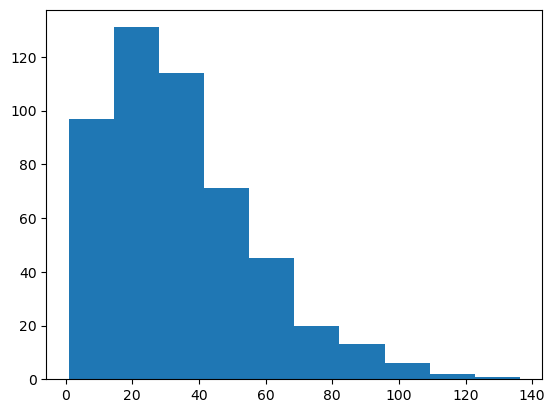

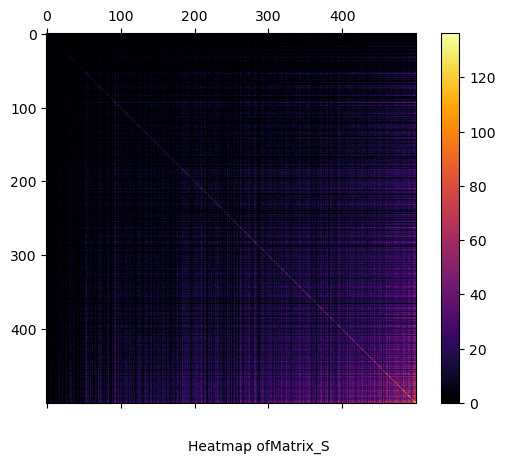

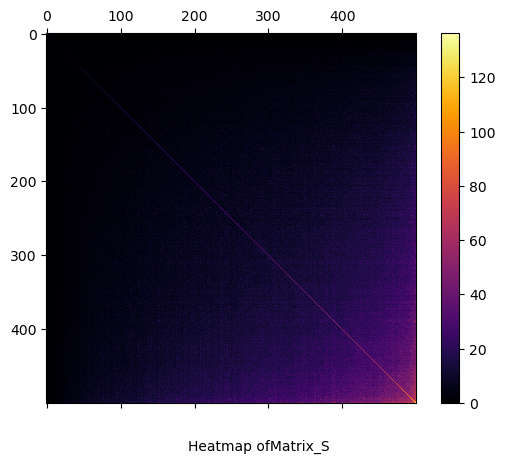

In [47]:
new_cov = cov[p][:, p]
print(new_cov.max(), np.diag(new_cov).min())
plt.hist(np.diag(cov))
heatmap(cov);
heatmap(new_cov);

NameError: name 'pre_cov' is not defined

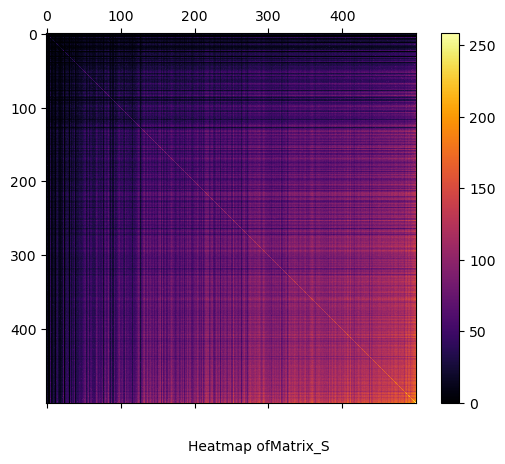

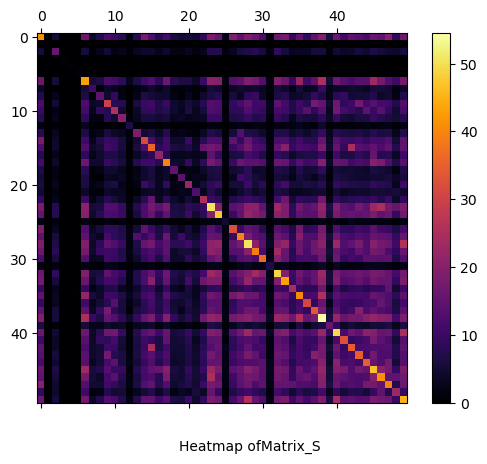

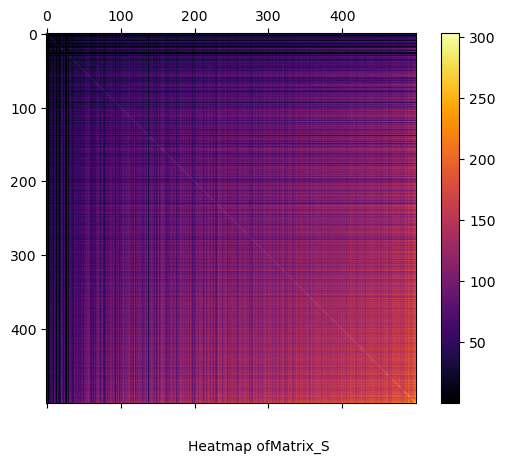

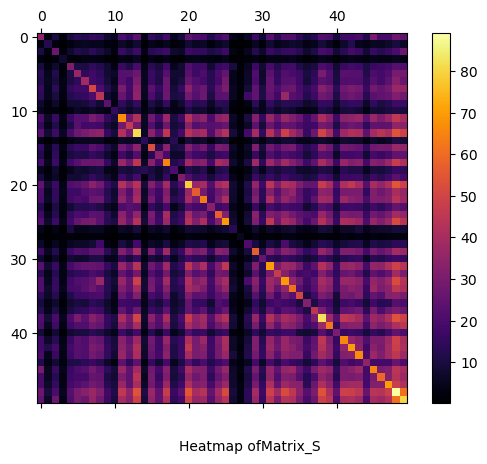

In [14]:
# Test case
nsim = 2
sample_size = 500 # N by N matrix

prob = 0.8
qrob = 0.2
observe_level = 0.5

for _iter in range(nsim):
    M = mass(sample_size, k = 5, max_mass = 0.9)
    cov = gen_cov(sample_size, M, poly_param=[0.8, 0.5])
    heatmap(cov)
    heatmap(cov[0: 50, 0: 50])
    aux_set = gen_aux_set(cov, prob=prob, qrob=qrob,
                          observe_level=observe_level)
    

In [21]:
import numpy as np
N = 5
t_org = np.arange(N)
pi = np.random.permutation(N)
print(pi)
x_org = np.array([np.random.randn(500) * max(k, 0.5) for k in range(N)])
S_org = np.cov(x_org)
np.set_printoptions(precision = 2)
print("Covariance of sorted time steps", S_org, sep="\n")

[2 0 1 3 4]
Covariance of sorted time steps
[[ 2.59e-01  5.20e-03 -6.02e-02 -6.91e-04  7.33e-03]
 [ 5.20e-03  9.14e-01 -1.12e-02 -1.59e-02  1.36e-01]
 [-6.02e-02 -1.12e-02  4.20e+00  2.86e-02  5.15e-01]
 [-6.91e-04 -1.59e-02  2.86e-02  8.79e+00 -5.84e-01]
 [ 7.33e-03  1.36e-01  5.15e-01 -5.84e-01  1.62e+01]]


In [19]:
print(x_org.shape)
np.cov(x_org)

(5, 500)


array([[ 2.71e-01,  1.23e-03,  1.70e-02, -2.55e-03,  7.56e-02],
       [ 1.23e-03,  9.59e-01, -1.71e-01,  1.15e-01,  3.09e-01],
       [ 1.70e-02, -1.71e-01,  4.12e+00,  2.46e-01, -1.95e-01],
       [-2.55e-03,  1.15e-01,  2.46e-01,  8.67e+00, -1.01e+00],
       [ 7.56e-02,  3.09e-01, -1.95e-01, -1.01e+00,  1.58e+01]])

In [22]:
t_obs = t_org[pi]
print(t_org, pi, t_obs)
x_obs = x_org[pi]
S_obs = np.cov(x_obs)
print("Covariance of unsorted time steps", S_obs, sep="\n")

[0 1 2 3 4] [2 0 1 3 4] [2 0 1 3 4]
Covariance of unsorted time steps
[[ 4.20e+00 -6.02e-02 -1.12e-02  2.86e-02  5.15e-01]
 [-6.02e-02  2.59e-01  5.20e-03 -6.91e-04  7.33e-03]
 [-1.12e-02  5.20e-03  9.14e-01 -1.59e-02  1.36e-01]
 [ 2.86e-02 -6.91e-04 -1.59e-02  8.79e+00 -5.84e-01]
 [ 5.15e-01  7.33e-03  1.36e-01 -5.84e-01  1.62e+01]]


In [27]:
# Using indexing S[p][:,p]
p = np.argsort(t_obs)
print(p)

[1 2 0 3 4]


In [ ]:
print("Reconstruction equals original:", S_obs[p][:,p] == S_org, sep="\n")

In [25]:
# Alternative using Permutation matrix
P = np.eye(N)[p]
print("Permutation matrix", P, sep="\n")
print("Reconstruction equals original:", P@S_obs@P.T == S_org, sep="\n")

Permutation matrix
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Reconstruction equals original:
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
